In [1]:
from wandb import wandb
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import os

In [24]:
# loaded_model1 = wandb.restore('model-best.h5', run_path="dat550/deepfake-resnet/runs/2wxf3t3n")
# os.rename('model-best.h5', 'model-best-resnet.h5')
model1 = load_model('model-best-resnet.h5')
model1._name = 'resnet'

# loaded_model2 = wandb.restore('model-best.h5', run_path="dat550/deepfake-efficientnet/runs/29425ckm")
# os.rename('model-best.h5', 'model-best-efficientnet.h5')
model2 = load_model('model-best-efficientnet.h5')
model2._name = 'efficient'


In [29]:
models = [model1, model2]
model_input = tf.keras.Input(shape=(128, 128, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

In [32]:
# Compile for returning accuracy
ensemble_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy"])

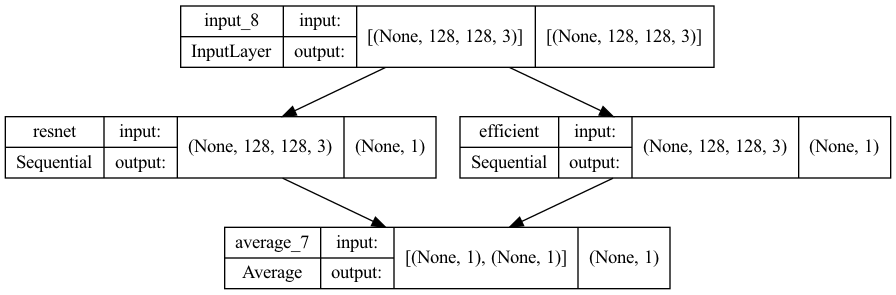

In [34]:
# Export model to png
tf.keras.utils.plot_model(ensemble_model, to_file='ensemble.png', show_shapes=True)

In [30]:
test_data = image_dataset_from_directory(
    "data/test",
    image_size=(128, 128),
    batch_size=1)

Found 1587 files belonging to 2 classes.


In [33]:
ensemble_model.evaluate(test_data)

KeyboardInterrupt: 